# Spam Mail Detection

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

### Reading the data

In [172]:
df=pd.read_csv('spam.csv')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [173]:
df.tail(10)

,Category,Message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


### Exploratory Data Analysis

In [174]:
df.shape #check shape of data

(5572, 2)

In [175]:
df.nunique()

Category       2
Message     5157
dtype: int64

In [176]:
df.isnull().sum()  # check missing values

Category    0
Message     0
dtype: int64

In [177]:
df.dtypes

Category    object
Message     object
dtype: object

In [178]:
df.info()  # check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [179]:
df.describe() # checking description

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [180]:
df['Category'].value_counts()  #check value count

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: ylabel='count'>

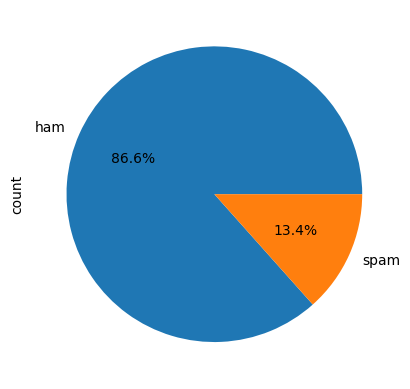

In [181]:
df['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Data Preprocessing

In [182]:
df.duplicated(subset='Message').sum() #check duplicates in message column

415

In [183]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(5157, 2)

In [184]:
df['Category']=df['Category'].map({'ham':0,'spam':1}) #mapping features to 0 and 1
df.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [185]:
def lowerChange(text):   # changing text into lowercase
    return text.lower() 

msg=df['Message'].apply(lowerChange)
msg.head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: Message, dtype: object

In [186]:
msg_reg = msg.str.replace('[^a-zA-Z0-9]+',' ')
msg_reg.head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: Message, dtype: object

In [187]:
from nltk.tokenize import word_tokenize
word=word_tokenize('english')

In [188]:
#stemming and tokenization
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
msg_stm = msg_reg.apply(lambda x:[stemmer.stem(i.lower()) 
                        for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
msg_stm.head(10)

0    go until jurong point , crazi .. avail onli in...
1                        ok lar ... joke wif u oni ...
2    free entri in 2 a wkli comp to win fa cup fina...
3    u dun say so earli hor ... u c alreadi then sa...
4    nah i do n't think he goe to usf , he live aro...
5    freemsg hey there darl it 's been 3 week 's no...
6    even my brother is not like to speak with me ....
7    as per your request mell mell ( oru minnaminun...
8    winner ! ! as a valu network custom you have b...
9    had your mobil 11 month or more ? u r entitl t...
Name: Message, dtype: object

In [189]:
#remove stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
msg_stp=msg_stm.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msg_stp.head(10)

0    go jurong point , crazi .. avail onli bugi n g...
1                        ok lar ... joke wif u oni ...
2    free entri 2 wkli comp win fa cup final tkts 2...
3          u dun say earli hor ... u c alreadi say ...
4           nah n't think goe usf , live around though
5    freemsg hey darl 's 3 week 's word back ! 'd l...
6    even brother like speak . treat like aid patent .
7    per request mell mell ( oru minnaminungint nur...
8    winner ! ! valu network custom select receivea...
9    mobil 11 month ? u r entitl updat latest colou...
Name: Message, dtype: object

In [190]:
# TF-IDF (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
x=vec.fit_transform(msg_stp)
x

<5157x7396 sparse matrix of type '<class 'numpy.float64'>'
	with 43676 stored elements in Compressed Sparse Row format>

In [191]:
y=df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Split Data

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

### Model Creation

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [194]:
knn=KNeighborsClassifier()
mnb=MultinomialNB()
svc = SVC()
abc=AdaBoostClassifier()
dtc = DecisionTreeClassifier(max_depth=10)
gbdt=GradientBoostingClassifier()
rfc=RandomForestClassifier()
lrc=LogisticRegression()

In [195]:
models = {
    'KNN': knn,
    'Naive Bayes': mnb,
    'SVC': svc,    
    'Adaboost': abc,
    'Decision Tree': dtc,
    'Gradient Boosting': gbdt,
    'Random Forest': rfc,
    'Logistic Regression': lrc }

In [196]:
def train_classifier(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, conf_matrix

In [197]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay


For:  KNN
 Accuracy:  0.89
 Precision:  1.0
 Confusion Matrix:
 [[1345    0]
 [ 164   39]]


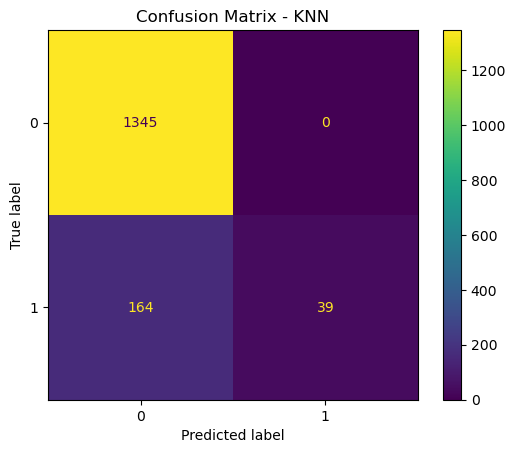


For:  Naive Bayes
 Accuracy:  0.96
 Precision:  1.0
 Confusion Matrix:
 [[1345    0]
 [  60  143]]


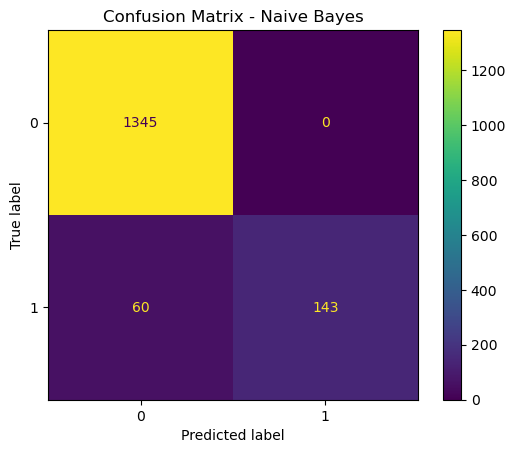


For:  SVC
 Accuracy:  0.97
 Precision:  0.98
 Confusion Matrix:
 [[1341    4]
 [  45  158]]


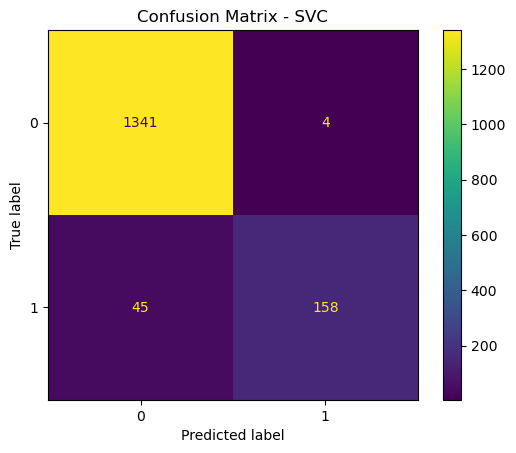


For:  Adaboost
 Accuracy:  0.97
 Precision:  0.94
 Confusion Matrix:
 [[1333   12]
 [  30  173]]


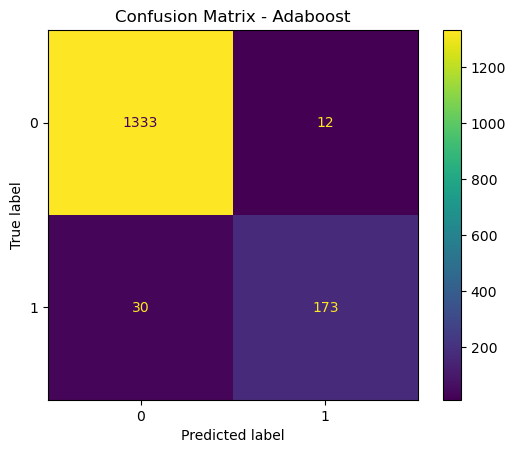


For:  Decision Tree
 Accuracy:  0.95
 Precision:  0.84
 Confusion Matrix:
 [[1314   31]
 [  44  159]]


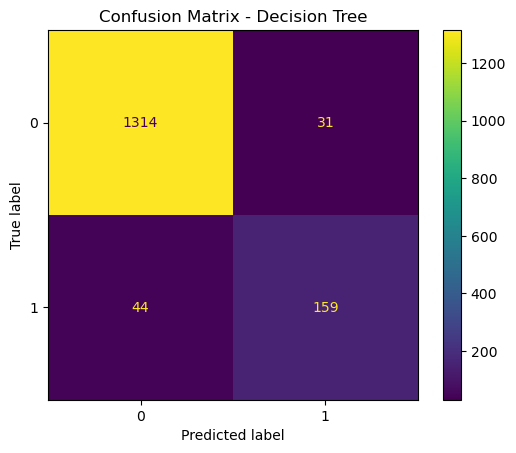


For:  Gradient Boosting
 Accuracy:  0.97
 Precision:  0.96
 Confusion Matrix:
 [[1338    7]
 [  44  159]]


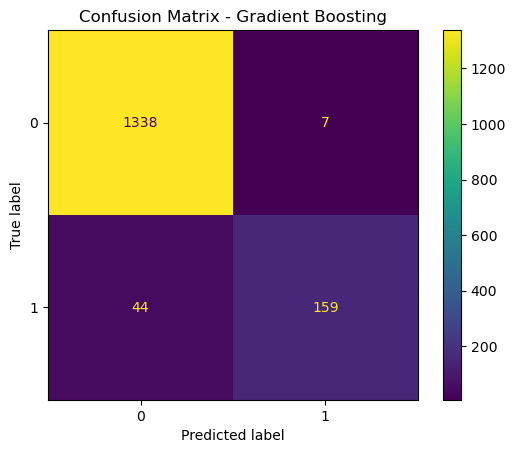


For:  Random Forest
 Accuracy:  0.98
 Precision:  0.98
 Confusion Matrix:
 [[1342    3]
 [  32  171]]


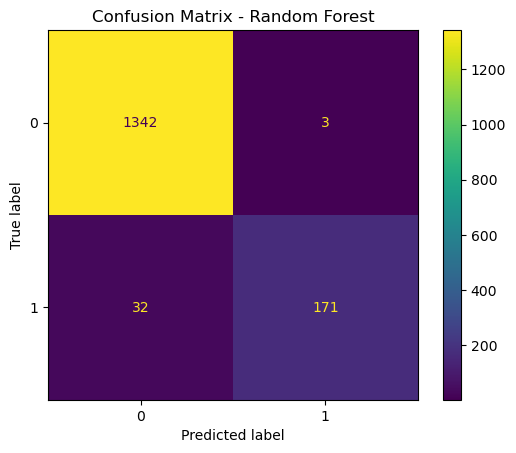


For:  Logistic Regression
 Accuracy:  0.95
 Precision:  0.96
 Confusion Matrix:
 [[1340    5]
 [  78  125]]


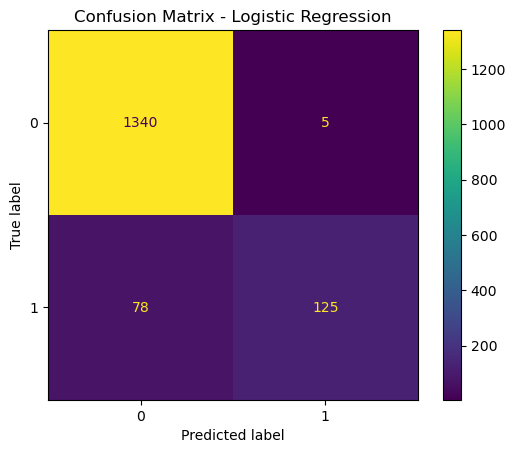

In [198]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
    current_accuracy, current_precision, current_conf_matrix = train_classifier(model, x_train, y_train, x_test, y_test)
    rounded_accuracy = round(current_accuracy, 2)
    rounded_precision = round(current_precision, 2)
    
    print()
    print("For: ", name)
    print(" Accuracy: ", rounded_accuracy)
    print(" Precision: ", rounded_precision)
    print(" Confusion Matrix:\n", current_conf_matrix)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=current_conf_matrix, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}', fontsize=12)
    plt.show()

    accuracy_scores.append(rounded_accuracy)
    precision_scores.append(rounded_precision)


### Conclusion

- In this note book we created several models that can predict if a message is spam or not.
- Accuracy and Precision for the corresponding models have been calculated and comapred which models gave good performance.
- Confusion matrix were utilized to evaluate each model performance using different metrics within the matrix